# Lecture 10-1

# Modeling in Python: statsmodels & sklearn

## Week 10 Monday

## Miles Chen, PhD

## Final Notes
Like a homework: Jupyter notebook, maybe some data files. Take home, on zoom. Can look up documentation, but no way of enforcing restrictions, so may be open resources.

Rn thinking 2 sections:
1. Pandas and matplotlib, grouping summaries, joining tables
2. Class defining and add some methods

## Rest of week 10
No more lecture view quizzes, but still lecture.

# modeling data in python:

Most popular package is scikit learn (machine learning stuff, where Python is probably better than R at it). Scikit-learn is not the best for a 'traditional' stats approach.

the **statsmodels library** is better suited for traditional stats. (actually R is best for this, diagnostic plots, etc.)

Be sure to visit and read the documentation on the StatsModels website: https://www.statsmodels.org/stable/index.html

In [1]:
# the statsmodels.api uses numpy array notation
# statsmodels.formula.api use formula notation (similar to R's formula notation)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

`conda` can install stuff outside of Python, while `pip` is just for Python. `statsmodels.formula.api` is like R's modeling stuff, with `y~factor(A)...`

# A minimal OLS example

Four pairs of points

In [2]:
x = np.array([1,2,3,4])
y = np.array([2,6,4,8])

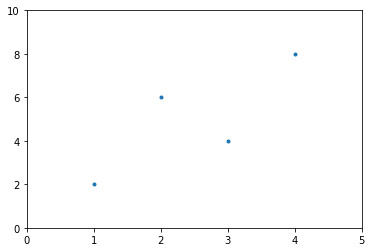

In [3]:
plt.scatter(x,y, marker = '.')
plt.xlim(0,5)
plt.ylim(0,10)
plt.show()

In [4]:
# make a dataframe of our data
d = pd.DataFrame({'x':x, 'y':y})
print(d)

   x  y
0  1  2
1  2  6
2  3  4
3  4  8


Seaborn lmplot

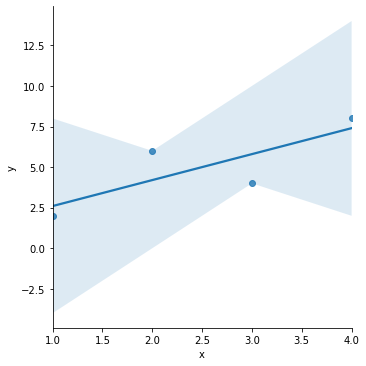

In [5]:
sns.lmplot(x = 'x', y = 'y', data = d)

Recall that seaborn doesn't give any info on the created fitted line.

## formula notation with statsmodels
use statsmodels.formula.api (often imported as smf)

In [6]:
# data is in a dataframe
model = smf.ols('y ~ x', data = d)

In [7]:
print(model)

In [8]:
# estimation of coefficients is not done until you call fit() on the model
results = model.fit()

In [9]:
print(results)

Wrapper object

In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     3.556
Date:                Mon, 03 Jun 2024   Prob (F-statistic):              0.200
Time:                        09:12:25   Log-Likelihood:                -6.8513
No. Observations:                   4   AIC:                             17.70
Df Residuals:                       2   BIC:                             16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000      2.324      0.430      0.7

C:\Users\tesslacoil\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Using the abline_plot function for plotting the results

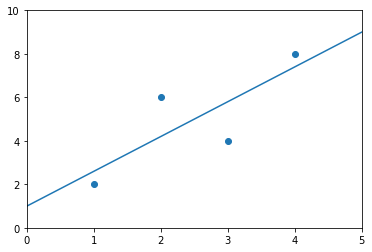

In [11]:
sm.graphics.abline_plot(model_results = results)
plt.scatter(d.x, d.y)

plt.xlim(0,5)
plt.ylim(0,10)

plt.show()

### Generating an anova table

In [12]:
print(sm.stats.anova_lm(results))

           df  sum_sq  mean_sq         F  PR(>F)
x         1.0    12.8     12.8  3.555556     0.2
Residual  2.0     7.2      3.6       NaN     NaN


### Making predictions
Predicting y for x-values `2` and `4`

In [14]:
results.predict({'x' : np.array([2, 4])})

0    4.2
1    7.4
dtype: float64

## numpy array notation
similar to sklearn's notation

In [15]:
print(x)

[1 2 3 4]


In [16]:
X = sm.add_constant(x)  # need to add a constant for the intercept term.
# because we are using the numpy notation, we use sm rather than smf

In [17]:
print(X)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]


$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$

$$\hat y_i = \beta_0 + \beta_1 x_i$$


$$\mathbf{\hat{Y}} = \boldsymbol{\beta} \mathbf{X}$$

$$\boldsymbol{\beta} = \left [\beta_0, \beta_1 \right ]$$


In [18]:
y

array([2, 6, 4, 8])

Needs X to be a matrix

In [19]:
model2 = sm.OLS(y, X)  # OLS is capitalized in the numpy notation

In [20]:
results2 = model2.fit()

In [21]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     3.556
Date:                Mon, 03 Jun 2024   Prob (F-statistic):              0.200
Time:                        09:17:55   Log-Likelihood:                -6.8513
No. Observations:                   4   AIC:                             17.70
Df Residuals:                       2   BIC:                             16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000      2.324      0.430      0.7

C:\Users\tesslacoil\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Summary is the same because data is the same

OLS solution:

$$(X^TX)^{-1}X^TY$$

In [22]:
X

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.]])

`@` matrix multiplication operator

In [23]:
np.linalg.inv(X.T @ X) @ (X.T @ y)

array([1. , 1.6])

## Example

Taken directly from https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

In [24]:
np.random.seed(9876789)

generate artificial data:

In [25]:
nsample = 101
x = np.linspace(0, 10, nsample)
X = np.column_stack((x, x ** 2))

In [26]:
X[:6,:]

array([[0.  , 0.  ],
       [0.1 , 0.01],
       [0.2 , 0.04],
       [0.3 , 0.09],
       [0.4 , 0.16],
       [0.5 , 0.25]])

In [27]:
X[95:,:]

array([[  9.5 ,  90.25],
       [  9.6 ,  92.16],
       [  9.7 ,  94.09],
       [  9.8 ,  96.04],
       [  9.9 ,  98.01],
       [ 10.  , 100.  ]])

X has two columns. First column goes from 0 to 10. Values are spaced out by 0.1.
 The second column is the first column squared. Values go from 0 to 100.

intercept is 10, coefficient is 5, and e being some random noise (standard deviation of 20)

In [28]:
beta = np.array([10, 5, 2])
e = np.random.normal(size=nsample, scale = 20)

In [29]:
X = sm.add_constant(X)
y_true = np.dot(X, beta)
y = y_true + e

Note we added a column of 1s to the matrix X.

The true values of beta are 1 for the intercept, 0.1 for the linear component, and 10 for the quadratic.

In [30]:
X[:6,:]

array([[1.  , 0.  , 0.  ],
       [1.  , 0.1 , 0.01],
       [1.  , 0.2 , 0.04],
       [1.  , 0.3 , 0.09],
       [1.  , 0.4 , 0.16],
       [1.  , 0.5 , 0.25]])

We use array notation.

Below are the true values.

In [31]:
y_true[:6]

array([10.  , 10.52, 11.08, 11.68, 12.32, 13.  ])

In [32]:
y[:6]

array([-6.81031788, 42.46990517, 20.39084082,  1.51682128, 71.00611392,
       21.2578884 ])

In [33]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     596.2
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           1.40e-55
Time:                        09:24:50   Log-Likelihood:                -450.04
No. Observations:                 101   AIC:                             906.1
Df Residuals:                      98   BIC:                             913.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8504      6.193      2.721      0.0

For C.I. `[4.561      29.140]`, the true value, 10 is in there.

Quantities of interest can be extracted directly from the fitted model. Type `dir(results)` for a full list. Here are some examples:

In [34]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  [16.85044423  2.16361558  2.20962084]
R2:  0.9240498683747473


In [37]:
results.pvalues

array([7.70356050e-03, 4.51501079e-01, 2.82381832e-12])

You can use the `get_prediction()` method which produces a prediction results object.

In [38]:
pred_ols = results.get_prediction()

In [39]:
pred_ols

The prediction results object has another method `summary_frame()` which produces a data frame of predictions for each observation. The columns are as follows.

Recall that prediction interval is for when you're predicting a point using your model

In [40]:
pred_ols.summary_frame()

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0     16.850444  6.192862       4.560911      29.139977    -26.898503   
1     17.088902  5.950169       5.280985      28.896819    -26.527203   
2     17.371552  5.715143       6.030038      28.713067    -26.120604   
3     17.698395  5.487954       6.807729      28.589061    -25.678377   
4     18.069430  5.268787       7.613694      28.525166    -25.200192   
..          ...       ...            ...            ...           ...   
96   241.259810  5.268787     230.804074     251.715546    197.990188   
97   245.740740  5.487954     234.850074     256.631406    202.363968   
98   250.265862  5.715143     238.924348     261.607376    206.773705   
99   254.835177  5.950169     243.027260     266.643094    211.219071   
100  259.448684  6.192862     247.159151     271.738217    215.699737   

     obs_ci_upper  
0       60.599391  
1       60.705007  
2       60.863709  
3       61.075167  
4       61.339051  
..            ...  
96     284.529432  
97     289.117512  
98     293.758019  
99     298.451282  
100    303.197631  

[101 rows x 6 columns]

With the summary frame, we can produce a prediction interval.

In [41]:
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

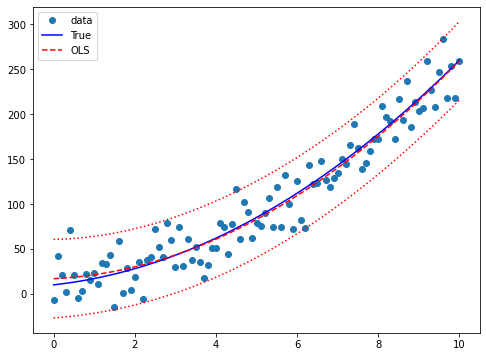

In [42]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, "o", label="data")
plt.plot(x, y_true, "b", label="True")
# r = red line, -- = dashed line
plt.plot(x, results.fittedvalues, "r--", label="OLS")
plt.plot(x, iv_u, "r:")
plt.plot(x, iv_l, "r:")
plt.legend(loc="best")

Prediction interval gets most of the points within it.

# Scikit Learn

## classification example with iris data

Has a lot of good documentation, how to do it + full explanations

In [43]:
from sklearn.datasets import load_iris

In [44]:
iris = load_iris()
type(iris) # iris is a Bunch (like a dictionary)

sklearn.utils.Bunch

In [45]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

This is your X matrix:

In [46]:
print(iris.data[:10,]) # first 10 rows: we have 4 columns of variables

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [47]:
print(iris.feature_names)  # The predictor variables (features) are four numeric variables

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [48]:
iris.target # the target is a categorical variable with three levels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
print(iris.target_names) # the observations are one of the following three species

['setosa' 'versicolor' 'virginica']


0, 1, 2

In [50]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Splitting into training and testing data (using slice of data to predict another slice of data, and if it predicts well, then use model):

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size = 0.2, random_state = 1, 
                                                    stratify = iris.target)
# we stratify on iris.target to make sure that the training and test sets have the correct 

In [52]:
X_train.shape

(120, 4)

In [53]:
print(np.bincount(y_test))

[10 10 10]


# we will fit a k nearest neighbors classifier

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
dat = pd.DataFrame(X_train)
dat['species'] = pd.DataFrame(y_train)
dat.head()

0    1    2    3  species
0  5.1  3.7  1.5  0.4        0
1  4.6  3.2  1.4  0.2        0
2  6.9  3.1  5.1  2.3        2
3  5.5  2.6  4.4  1.2        1
4  5.6  2.9  3.6  1.3        1

Replacing infinities with nan

In [56]:
dat = dat.replace([np.inf, -np.inf], np.nan)

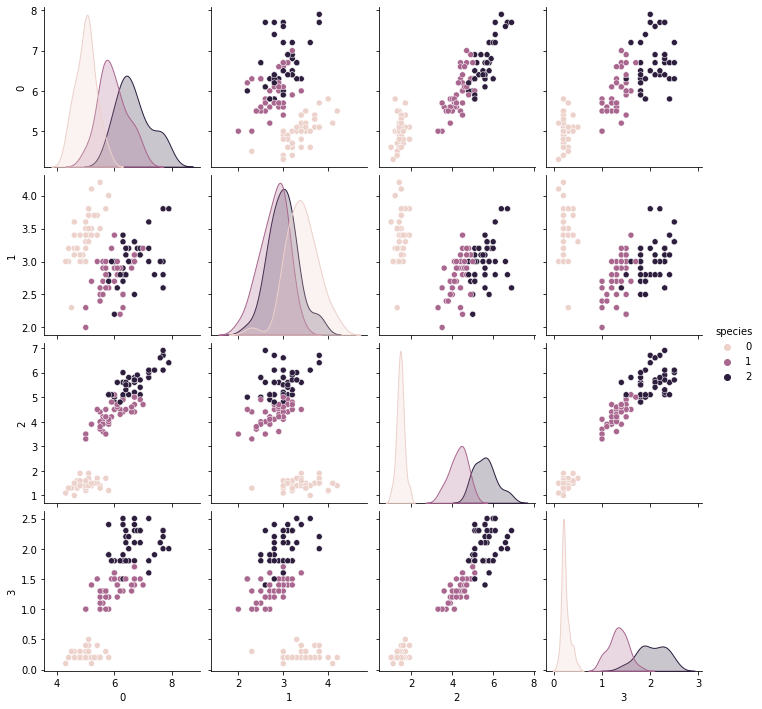

In [57]:
sns.pairplot(dat, hue = 'species')

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

Using 5 nearest neighbors. Now have a KNeightborsClassifier object.

In [59]:
print(knn)

KNeighborsClassifier()


In [60]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

Making predictions:

In [61]:
print(knn.predict(X_test))  # our predictions based on the fitted model

[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 1 0 0 1 1]


In [62]:
print(y_test)  # the actual values

[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 2 0 0 1 1]


`confusion_matrix` -> know true answers and have what we're predicting, letting us know how many times we got the correct answer. For `class 1` (row 1) we predicted all those (10) values correctly. For `class 3` we got 9 values correctly and 1 incorrectly guessed as class 2.

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, knn.predict(X_test))
# true answer is in rows, and the prediction is in the column
# we see that when the true answer is 2, the predition was 1 one time.
# no errors would be a diagonal matrix

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

Correctly predictied 29/30 times

In [64]:
# here we try a different knn model using only one nearest neighbor
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
confusion_matrix(y_test, knn1.predict(X_test))
# same performance

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

In [65]:
# another knn model using 25 nearest neighbors
knn25 = KNeighborsClassifier(n_neighbors=25)
knn25.fit(X_train, y_train)
confusion_matrix(y_test, knn25.predict(X_test))
# slighlty worse performance with 25 nearest neighbors
# we have 2 errors. The true value is 2 and we predicted 1 twice.

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  8]], dtype=int64)

# Automated parameter search using GridSearchCV

What if I want to test out a bunch of different nearest neighbor values.

So we can try a knn with 1 nearest neighbor

a knn with 2 neighbors

knn with 3 neighbors, etc.

Rather than manually fitting 50 different models, we can have python automatically fit 50 models for us using GridSearchCV.

GridSearchCV will try a bunch of different models (you can vary more than one parameter), and will report back the model score.

Keep in mind that the more parameters you try out, the longer it will take to test and fit all of the models.

In [66]:
from sklearn.model_selection import GridSearchCV
# Go from anywhere in 1 to 50 nearest neighbors
param_grid = {'n_neighbors': np.arange(1,50), 'weights': ['uniform','distance']}  # we make a dictionary called param_grid
# and the keyword will be the argument that goes into the model

knn = KNeighborsClassifier()  # note we do not specify n_neighbors here
knn_cv = GridSearchCV(knn, param_grid, cv = 5)  # we call GridSearchCV, we pass it the name of our model 'knn', and 
# also we give it the parameters it will search through
# cv=5 means we score it based on 5-fold cross validation

# we are not using the test data at all
# we are only using the training data

For example if we have a point and its 5 nearest neighbors are 3 B's and 2 A's -> 3 to 2 so the point will be class B. However with a weighted KNeighbors, would see which neighbors are closer and tell you which class the point is based on that. Like if 2 A class neighbors were closer than the 3 B class neighbors, you'd probably get the point to be classified as A

In [67]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [68]:
knn_cv.best_params_  # which set of parameters produced the best performing model?

{'n_neighbors': 13, 'weights': 'uniform'}

In [69]:
knn_cv.best_score_   # uses an accuracy score, which may not be the best metric

0.9833333333333334

In [70]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print(confusion_matrix(y_train, knn.predict(X_train)))

[[40  0  0]
 [ 0 38  2]
 [ 0  0 40]]


In [71]:
# Correct this many times out of total
118/120

0.9833333333333333

In [72]:
print(confusion_matrix(y_test, knn.predict(X_test)))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


In [73]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=13)
cv_scores = cross_val_score(knn, X_train, y_train, cv = 5)
print(cv_scores)
print(np.mean(cv_scores))

[0.95833333 1.         1.         1.         0.95833333]
0.9833333333333334


## Gaussian Naive Bayes
Assuming uncorrelated, see which class point is closest to

In [74]:
from sklearn.naive_bayes import GaussianNB
nbclass = GaussianNB()

In [75]:
nbclass.fit(X_train, y_train)

GaussianNB()

In [76]:
nbclass.predict(X_test)

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1])

In [77]:
print(confusion_matrix(y_test, nbclass.predict(X_test)))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


In [78]:
cross_val_score(nbclass, X_train, y_train, cv = 5)

array([0.91666667, 0.95833333, 0.95833333, 0.95833333, 0.95833333])

In [79]:
np.mean(cross_val_score(nbclass, X_train, y_train, cv = 5))

0.95